In [1]:
import pandas as pd
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

### Topic Modeling

In this notebook, we're going to learn about an unsupervised learning approach from NLP called Topic Modeling. This is a broad category, and we're going to learn about its most popular implementation, Latent Dirichlet Allocation.

Here's some intuition about the goals of Topic Modeling:
  * Similar in spirit to cluster techniques - find things with are similar 
  * Our datapoints are documents and our features are word counts
  * Documents that are about a similar subject probably use a lot of the same words with high probability (high prob words in each cluster)
  * Thus, the clusters of word counts can be thought of as simply "topics" (eg. Sports, Politics, Business)
  * This is unsupervised learning, so we want to extract these hidden topics from our corpus (we have no labels)
  * In LDA, there can be some overlap of the topics within a single document. A news article might use words and concepts from both economics and politics.
  
We're going to use the *gensim* package to do LDA.  

In [2]:
# read yelp.csv into a DataFrame
url = '../data/yelp.csv'
yelp = pd.read_csv(url)
X = yelp.text

In [3]:
len(X)

10000

In [4]:
list(X)

['My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!',
 'I have no idea why some people give bad reviews about this place. It goes to show you, you can

In the past, we've used CountVectorizer to do things like remove stop words, select the top features, and construct a document term matrix. We're going to do some of those things by hand, and let gensim take care of some others.

In [5]:
# remove common words and tokenize

# lets steal the stopwords from CountVectorizer. 
# So we'll initalialize a CountVectorizer() but we won't use it, we just want its word list.

stoplist = set(CountVectorizer(stop_words='english').get_stop_words() )
texts = [[word for word in document.lower().split() if word not in stoplist] for document in list(X)]

In [ ]:
texts
# list of list of words

In [8]:
# count up the frequency of each word
from collections import defaultdict
#from collections import OrderedDict
#frequency = OrderedDict()
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1          

# remove words that only occur a small number of times, can increase this if you want 
# smaller feature space
texts = [[token for token in text if frequency[token] > 2] for text in texts]

In [9]:
len(frequency)

70464

Next, we're going to create our bag-of-words representation of the data. Previously, we used CountVectorizer to generate a document-term-matrix. Gensim has similar functionality for us.

In [24]:
# Dictionary learns word counts and gives us the feature space
# which is just the word to feature id
dictionary = corpora.Dictionary(texts)

In [40]:
print len(dictionary)
print dictionary[331]

19457
cute


In [12]:
d = dictionary.token2id

In [13]:
d['cute']

331

In [23]:
# this objects stores everything we need for our bag of words representation
dictionary.doc2bow("golf golf car window waiter pastor delicious consider cute".split())

[(122, 1),
 (331, 1),
 (387, 1),
 (922, 1),
 (3576, 1),
 (3965, 1),
 (5126, 2),
 (5459, 1)]

Now we create a corpus in the bag of words representation by transforming each of our texts.

In [41]:
# this is equivalent to scikit learn's document-to-matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [42]:
print texts[1]
print type(dictionary.doc2bow(texts[0]))
dictionary.doc2bow(texts[0])

['idea', 'people', 'bad', 'reviews', 'place.', 'goes', 'you,', 'everyone.', 'probably', 'people', 'like', 'that.', 'case,', 'friend', 'arrived', 'pm', 'past', 'sunday.', 'pretty', 'crowded,', 'thought', 'sunday', 'evening', 'thought', 'wait', 'forever', 'seat', 'said', "we'll", 'seated', 'girl', 'comes', 'seating', 'else.', 'seated', 'waiter', 'came', 'got', 'drink', 'orders.', 'pleasant', 'host', 'seated', 'waiter', 'server.', 'prices', 'good', 'well.', 'placed', 'orders', 'decided', 'wanted', 'shared', 'baked', 'spaghetti', 'calzone', 'small', 'pizza', 'try', 'them.', 'calzone', 'huge', 'got', 'smallest', 'got', 'small', 'pizza.', 'awesome!', 'friend', 'liked', 'pizza', 'better', 'liked', 'calzone', 'better.', 'calzone', 'does', 'sauce', "that's", 'like', 'sauce!', 'box', 'pizza', 'home', 'door', 'so,', 'great', 'like', 'bad', 'reviewers.', 'goes', 'try', 'things', 'bad', 'reviewers', 'issues.']
<type 'list'>


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 2),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 2),
 (27, 2),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 2),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 1)]

In [43]:
print texts[5]
len(set(texts[5]))

['quiessence', 'is,', 'simply', 'put,', 'beautiful.', 'windows', 'earthy', 'wooden', 'walls', 'feeling', 'warmth', 'inside', 'restaurant', 'perched', 'middle', 'farm.', 'restaurant', 'fairly', 'tuesday', 'secured', 'reservations', 'just', 'couple', 'days', 'before.', 'friend', 'sampled', 'sandwiches', 'farm', 'kitchen', 'earlier', 'week,', 'impressed', 'want', 'eat', 'restaurant.', 'crisp,', 'fresh', 'veggies', "didn't", 'ordered', 'salad', 'orange', 'grapefruit', 'slices', 'start.', 'good;', "didn't", 'know', 'liked', 'raw', 'tried', 'pesto', 'aioli', 'sauces.', 'entrees,', 'ordered', 'lamb', 'friend', 'ordered', 'pork', 'service', 'started', 'good,', 'quickly.', 'waiting', 'food', 'took', 'long', 'time', '(a', 'couple', 'seated', 'received', 'finished', 'entrees', 'received', 'bothered', 'explain', 'situation', 'apologized', '45', 'minutes', 'later.', 'apparently', 'chef', 'unhappy', 'sauce', 'entree,', 'started', "isn't", 'really', 'problem,', 'communicated', 'earlier.', 'comped', '

144

In [44]:
print len(corpus)
print len(corpus[5])
print type(corpus[5])
print corpus[5]

10000
144
<type 'list'>
[(2, 1), (7, 1), (40, 1), (42, 1), (43, 1), (51, 1), (59, 1), (60, 1), (99, 2), (100, 2), (123, 1), (124, 1), (126, 1), (174, 1), (200, 1), (202, 1), (203, 1), (204, 1), (205, 1), (206, 1), (207, 1), (208, 1), (209, 1), (210, 1), (211, 1), (212, 1), (213, 1), (214, 1), (215, 1), (216, 1), (217, 2), (218, 1), (219, 1), (220, 1), (221, 1), (222, 1), (223, 1), (224, 1), (225, 1), (226, 1), (227, 1), (228, 1), (229, 1), (230, 1), (231, 1), (232, 1), (233, 1), (234, 1), (235, 1), (236, 1), (237, 1), (238, 1), (239, 1), (240, 1), (241, 1), (242, 1), (243, 1), (244, 1), (245, 1), (246, 1), (247, 1), (248, 1), (249, 3), (250, 1), (251, 2), (252, 1), (253, 1), (254, 1), (255, 1), (256, 1), (257, 1), (258, 4), (259, 1), (260, 1), (261, 2), (262, 1), (263, 1), (264, 1), (265, 1), (266, 2), (267, 1), (268, 1), (269, 1), (270, 1), (271, 2), (272, 1), (273, 1), (274, 1), (275, 1), (276, 1), (277, 2), (278, 1), (279, 1), (280, 1), (281, 1), (282, 1), (283, 1), (284, 1), (285, 

Now that we have our corpus, we will fit an LDA model to this data. We can pick any number of topics we like and see how the result turns out.


In [45]:
# corpus: word count per document
# dictionary: is the id to word mapping
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=10, alpha = 'auto')
# warning, this takes a minute or two

In [52]:
per_word_perplex = []
for n_topics in range(1, 100):
    lda = models.LdaModel(corpus, id2word=dictionary, num_topics=n_topics, alpha = 'auto')
    perplex = lda.log_perplexity(corpus, total_docs=None)
    per_word_perplex.append(perplex)

In [64]:
per_word_perplex1 = []
for n_topics in range(101, 200):
    lda = models.LdaModel(corpus, id2word=dictionary, num_topics=n_topics, alpha = 'auto')
    perplex = lda.log_perplexity(corpus, total_docs=None)
    per_word_perplex1.append(perplex)

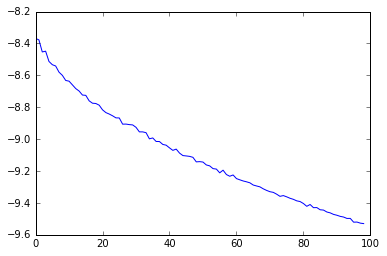

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(per_word_perplex)

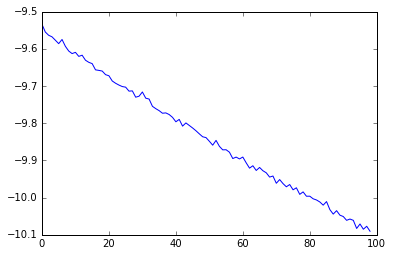

In [65]:
plt.plot(per_word_perplex1)

In [66]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=200, alpha = 'auto')

In [ ]:
# word to probability, the others are 0
t = lda.show_topics()
lda.show_topic(0)

In [ ]:
# first topic
t[0]

In [ ]:
lda.top_topics(corpus)

In [ ]:
t[0]

In [ ]:
#### pyLDAvis.topic_term_dists : array-like, shape (n_topics, n_terms)
lda.show_topic(0)

In [ ]:
#### pyLDAvis.doc_topic_dists : array-like, shape (n_docs, n_topics)
# You can then infer topic distributions on new, unseen documents, with
# lda = LdaModel(corpus, num_topics=10)
doc_bow = dictionary.doc2bow(texts[0])
lda[doc_bow]

In [ ]:
#### pyLDAvis.doc_lengths : array-like, shape n_docs
len(texts[0])

In [ ]:
#### pyLDAvis.vocab : array-like, shape n_terms
dictionary = corpora.Dictionary(texts)
dictionary.token2id

In [ ]:
# pyLDAvis.term_frequency : array-like, shape n_terms
#The count of each particular term over the entire corpus. 
#The ordering of these counts should correspond with vocab and topic_term_dists.
frequency

In [ ]:
import numpy as np
import json

def load_data(filename):
    with open(filename, 'r') as f:
        data_input = json.load(f)
        data = {'topic_term_dists': data_input['phi'],\
            'doc_topic_dists': data_input['theta'],\
            'doc_lengths': data_input['doc.length'],\
            'vocab': data_input['vocab'],\
            'term_frequency': data_input['term.frequency']}
    return data

movies_model_data = load_data('/home/anna/Downloads/movie_reviews_input.json')

print('Topic-Term shape: %s' % str(np.array(movies_model_data['topic_term_dists']).shape))
print('Doc-Topic shape: %s' % str(np.array(movies_model_data['doc_topic_dists']).shape))
print('Doc-Lengths shape: %s' % str(np.array(movies_model_data['doc_lengths']).shape))
print('Term-Frequency shape: %s' % str(np.array(movies_model_data['term_frequency']).shape))
print movies_model_data['doc_topic_dists'][1]
#print type(movies_model_data)
#print movies_model_data['vocab'][0:10]
#print movies_model_data['term_frequency'][0:10]

In [61]:
import pyLDAvis.gensim

In [62]:
pyLDAvis.enable_notebook()

In [67]:
pyLDAvis.gensim.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
48     1.489456        1       1 -0.107087 -0.011967
42     1.209043        1       2 -0.100622  0.083207
171    1.008268        1       3 -0.049472 -0.101964
162    0.957927        1       4 -0.072012 -0.114090
11     0.931800        1       5 -0.082697  0.092897
47     0.903088        1       6 -0.089199 -0.055525
135    0.872646        1       7 -0.069776  0.137809
161    0.863970        1       8 -0.022650 -0.011526
15     0.862465        1       9 -0.086342  0.025296
145    0.858232        1      10 -0.088632  0.103898
76     0.858152        1      11 -0.064268 -0.091854
68     0.843101        1      12 -0.061227  0.121023
72     0.842337        1      13 -0.098034  0.007565
157    0.811442        1      14 -0.045320  0.045754
35     0.805734        1      15 -0.056499 -0.088541
156    0.803025        1      16 -0.103180 -0.056455
84     0.797204        1      17  0.044776 -0.122088
180    0.795148        1      18 -0.031469 -0.027113
82     0.782689        1      19  0.012912  0.047637
148    0.730968        1      20 -0.022199  0.085830
1      0.722370        1      21 -0.018855  0.038700
98     0.707673        1      22 -0.095602 -0.040912
113    0.702692        1      23 -0.097001 -0.032267
57     0.694527        1      24 -0.065652 -0.084982
119    0.687666        1      25 -0.055582  0.085032
71     0.687283        1      26 -0.021017 -0.082089
14     0.683155        1      27 -0.016449  0.032328
167    0.682025        1      28 -0.021358  0.016667
104    0.681822        1      29 -0.092569 -0.019793
116    0.681330        1      30 -0.024681 -0.046189
...         ...      ...     ...       ...       ...
70     0.336284        1     171 -0.042717  0.022119
173    0.336063        1     172  0.072626  0.064549
61     0.324307        1     173  0.060006  0.012942
92     0.322769        1     174  0.048275 -0.004611
28     0.322449        1     175  0.030096 -0.016632
196    0.314590        1     176  0.047116 -0.027278
120    0.304966        1     177  0.096593 -0.011660
185    0.304634        1     178  0.060667 -0.047783
40     0.303527        1     179  0.110557  0.007765
64     0.303130        1     180  0.124963  0.020789
110    0.296879        1     181  0.061180 -0.001830
43     0.296130        1     182  0.054083  0.026883
184    0.295642        1     183  0.084448 -0.028757
190    0.291525        1     184  0.062809  0.065520
192    0.287182        1     185  0.044135 -0.027231
155    0.282652        1     186  0.000104  0.039277
31     0.281251        1     187  0.027310 -0.017445
178    0.277575        1     188 -0.037143 -0.026241
7      0.265305        1     189  0.002354  0.005381
105    0.264717        1     190  0.093184 -0.007700
142    0.262728        1     191  0.034432  0.048451
128    0.261961        1     192  0.055439 -0.025514
67     0.246371        1     193  0.085578  0.024203
51     0.244727        1     194  0.070843  0.032121
62     0.243114        1     195  0.057128 -0.052772
56     0.232008        1     196  0.078409  0.037276
191    0.220494        1     197  0.011184 -0.008435
179    0.201391        1     198  0.149852  0.032001
96     0.199003        1     199  0.067056 -0.064489
149    0.193209        1     200  0.096204  0.047882

[200 rows x 5 columns], topic_info=       Category         Freq         Term  Total  loglift  logprob
5090    Default   951.000000        pizza    951  30.0000  30.0000
13153   Default  1022.000000            &   1022  29.0000  29.0000
15091   Default  2859.000000            -   2859  28.0000  28.0000
5021    Default   514.000000        sushi    514  27.0000  27.0000
3763    Default  3975.000000        great   3975  26.0000  26.0000
5175    Default   576.000000       coffee    576  25.0000  25.0000
779     Default   325.000000            .    325  24.0000  24.0000
15548   Default   459.000000          ice    459  23.0000 